In [ ]:
# 2.1 Домашнее задание начального уровня

#Вычислите евклидово расстояние между кластером c1 и кластером c3. Это расстояние получилось меньше, или больше чем расстояние между кластером c1 
#и кластером c2?

#Координаты центра для трёх кластеров:

#    "красный" кластер c1=[1.0,1.5]
#    "оранжевый" кластер c2=[−1.0,−0.5]
#    "зеленый" кластер c3=[1.0,−0.5]

In [2]:
from scipy.spatial.distance import euclidean

c1 = [1.0, 1.5]
c3 = [1.0, -0.5]

dist = euclidean(c1, c3)
print("Расстояние между кластерами c1 и c3: %.4f" % dist)

Расстояние между кластерами c1 и c3: 2.0000


In [ ]:
# Это расстояние получилось меньше,чем расстояние между кластером c1 
#и кластером c2

In [ ]:
# 4.1 Домашнее задание начального уровня

#Потренируйтесь в программировании на python. Надо будет найти расстояние от каждой точки из массива X до центра кластера, 
#а потом просуммировать эти расстояния. Это будет реализацией библиотечной функции sklearn.metrics.pairwise.euclidean_distances из первого урока.
#В итоге у Вас должно получиться число чуть более 16 - это и будет расстояние. 

In [3]:
import numpy as np

clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

In [33]:
m_sum=0
#s_dist=0
for i in range(0,10):
   #for a in range(2):
    sum=((clust[i][0]- centroid[0])**2 + (clust[i][1]- centroid[1])**2)
    #for a in range(2):
    #print(clust[i][a])
    #print(sum)
    m_sum=m_sum+sum
    #c1=[clust[i][0],[clust[i][1]]]
    #c3 = [-0.9774245525274352, -0.032635425821084516]
   # print(c1)
    #dist = euclidean(c1, c3)
    #print(dist)
    #s_dist+=dist
print(m_sum)    

16.31211696438564 0


In [ ]:
# Обучите алгоритм k-средних для количества кластеров n=3 на том же датасете, который содержится в файле data/clustering.pkl. Визуализируйте результат:

In [ ]:
import pickle
import numpy as np

# данные получены с помощью функции make_classification 
with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])
#data_clustering 

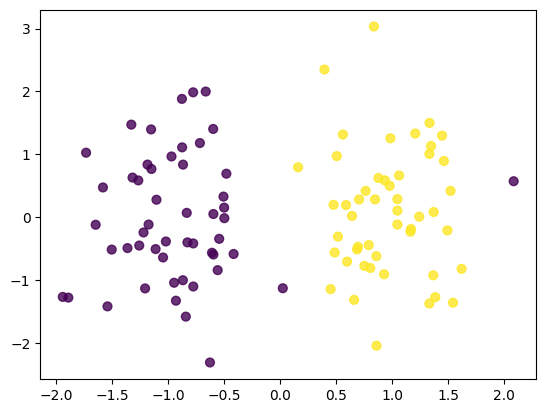

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, marker='o', alpha=0.8, label='data')
plt.show()

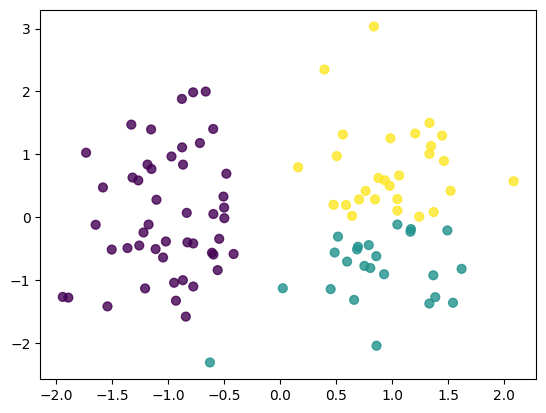

In [39]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X)

plt.scatter(X[:, 0], X[:, 1], s=40, c=kmeans_model.labels_, marker='o', alpha=0.8, label='data')
plt.show()

In [ ]:
# Мы узнали про эвристику, улучшающую алгоритм: запустить несколько раз алгоритм, запомнить, куда попали центроиды при каждом запуске, а потом усреднить координаты за все несколько запуска.

#Попробуйте применить эту эвристику на практике:

#    используйте 10 запусков алгоритма k-средних для k=2 с параметрами

#    kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)

#    в каждом запуске сохраняйте координаты центроидов общий массив c. См. cluster_centers_ : array, [n_clusters, n_features]
#    визуализируйте координаты точек из c на фоне исходного множества точек


In [109]:

c=[]
for i in range(10):
    kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, max_iter=2,algorithm='lloyd')#,# max_iter=2)
    km=kmeans_model.fit(X)
    a=km.cluster_centers_
    #print(a)
    #b= np.append(b,a)
    c.append(a)
    
    #print(km.cluster_centers_)    
print(c)    

[array([[-0.94785413,  0.05178137],
       [ 0.98704862,  0.01656288]]), array([[-0.97469084,  0.00582233],
       [ 0.97518727,  0.06322628]]), array([[ 0.95917947,  0.07757361],
       [-0.99782309, -0.01028211]]), array([[-0.94785413,  0.05178137],
       [ 0.98704862,  0.01656288]]), array([[-0.97742455, -0.03263543],
       [ 0.97792098,  0.10168404]]), array([[-1.0170251 , -0.24497453],
       [ 0.7995344 ,  0.25413053]]), array([[-1.03249556, -0.29095001],
       [ 0.74809716,  0.27021261]]), array([[-0.97469084,  0.00582233],
       [ 0.97518727,  0.06322628]]), array([[ 0.88400688,  0.19764301],
       [-0.9963307 , -0.14941806]]), array([[-0.36974209, -0.83721036],
       [ 0.27936371,  0.69214871]])]


In [105]:
#np.append(np_arr1, np_arr2, axis=1)

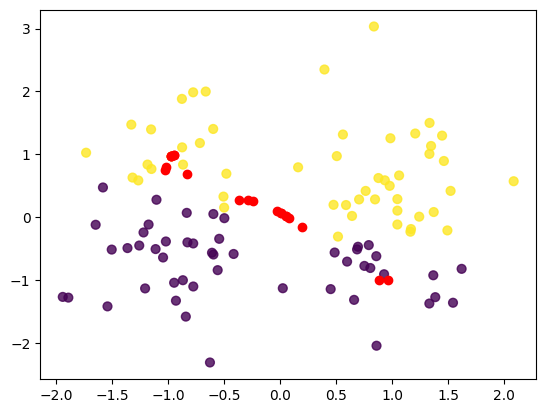

In [114]:
import matplotlib.pyplot as plt

# Массив координат c
# 

# Нарисуем каждую точку
for i in c:
    x, y = i
    plt.plot(x, y, 'o', color='red')

plt.scatter(X[:, 0], X[:, 1], s=40, c=kmeans_model.labels_, marker='o', alpha=0.8, label='data')
#plt.show()
# Покажем график
plt.show()

In [ ]:
#Обучите модель DBSCAN с параметром min_samples=8. Визуализируйте результат.

In [1]:
import pickle
import numpy as np

# данные получены с помощью функции make_classification 
with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

In [2]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.6, min_samples=8).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

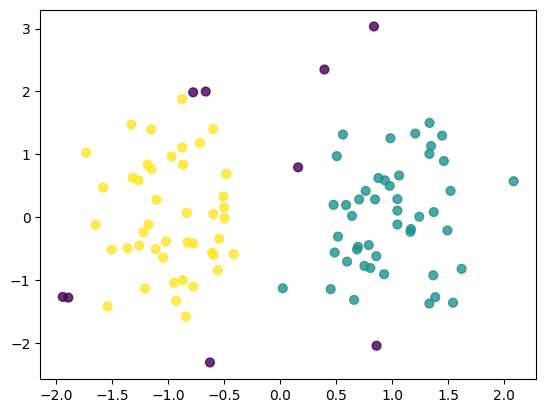

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = db.labels_

plt.scatter(X[:, 0], X[:, 1], s=40, c=labels, marker='o', alpha=0.8, label='data')
plt.show()

In [ ]:
#10.1 Домашнее задание начального уровня

#Обучите k-means для количества кластеров k=4 на датасете data/clustering.pkl.
#Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [27]:
import pickle
import numpy as np
from sklearn.cluster import KMeans
# данные получены с помощью функции make_classification 
with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])



#import KMeans

model = KMeans(n_clusters=4).fit(X)

In [ ]:
#print(Y)

In [9]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, model.labels_)

print("Качество кластеризации по метрике силуэтта %.3f" % score)

Качество кластеризации по метрике силуэтта 0.439


In [ ]:
# метрика силуэтта уменьшилась.Стало хуже. лучше результат при  К=2

In [ ]:
#Обучите k-means для количества кластеров k=4 на датасете data/clustering.pkl. 
#Как изменилась метрика AMI? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [10]:
from sklearn.metrics.cluster import adjusted_mutual_info_score



print("Качество кластеризации по метрике AMI %.3f" % score)
with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

model = KMeans(n_clusters=4).fit(X)
score = adjusted_mutual_info_score(Y, model.labels_, average_method='arithmetic')

Качество кластеризации по метрике AMI 0.439


In [ ]:
#  метрика AMI ухудшилась. По метрике AMI лучше 3 кластера.

In [ ]:
# Загрузите датасет clustering_hw.csv из приложенной директории data и визуализируйте данные. Должно получится как-то так:
#В рамках домашней работы

#    вычислите оптимальное количество кластеров k
#    обучите k-means с количеством кластеров k
#    к какому кластеру принадлежит точка x=(5,8)? к какому кластеру принадлежит точка x=(0,5)? Они принадлежат к разным кластерам или одному?
#    Каково качество кластеризации по AMI


In [15]:
import numpy as np
import pandas as pd
df = pd.read_csv('clustering_hw.csv', sep=',')
df

,x1,x2,y
0,6.221343,4.968753,2
1,7.360892,8.857455,2
2,-0.108178,4.730723,1
3,3.127358,1.927986,0
4,-0.817259,6.759974,1
...,...,...,...
295,0.863590,4.798039,1
296,4.451104,2.183275,0
297,7.530399,8.261081,2
298,0.103995,5.893627,1


In [ ]:
# X = np.array(df['x1'])
# Y = np.array(df['y'])
# print(Y)

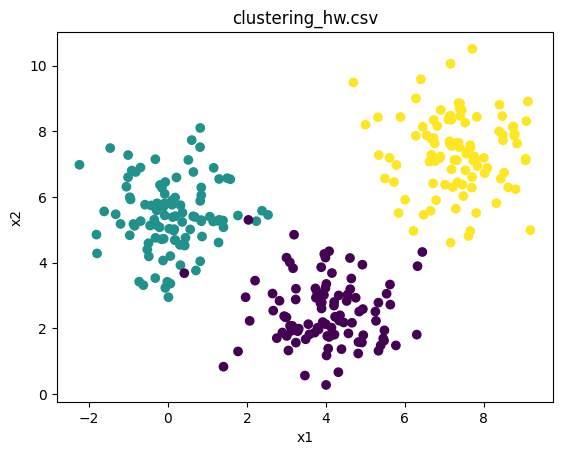

In [32]:
fig, ax = plt.subplots()

# Визуализируйте данные
ax.scatter(df['x1'], df['x2'], c=df['y'], cmap='viridis')

#  метки осей и заголовок
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('clustering_hw.csv')

#  график
plt.show()

In [39]:
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances
X = df[['x1', 'x2']].to_numpy()
metrics = []
MAX_CLUSTERS = 10
for cluster_num in range(1, MAX_CLUSTERS):
    kmeans_model = KMeans(n_clusters=cluster_num, random_state=99).fit(X)
    centroids, labels = kmeans_model.cluster_centers_, kmeans_model.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            X[labels==centroid_label],
            centroids[centroid_label,:].reshape(1,-1)
        ).sum(axis=0)[0]
    print("cluster_num %s, metric %s" % (cluster_num, metric))
    metrics.append(metric)

cluster_num 1, metric 1105.8973781101085
cluster_num 2, metric 663.5712032768091
cluster_num 3, metric 374.6589714184052
cluster_num 4, metric 349.5793730721086
cluster_num 5, metric 327.25148614114744
cluster_num 6, metric 301.5878775343317
cluster_num 7, metric 283.9486018009391
cluster_num 8, metric 271.60794567283966
cluster_num 9, metric 263.9624924500894


best cluster num: 3


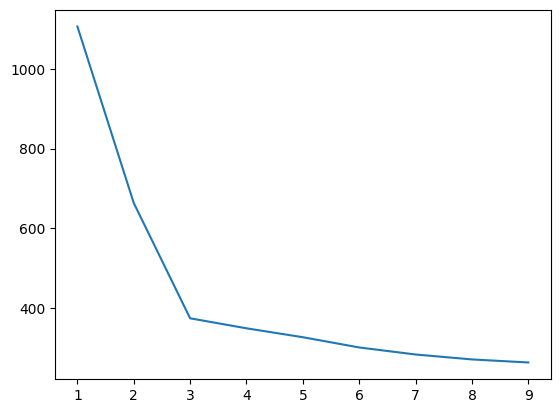

In [40]:
D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
print("best cluster num: %s" % (np.argmin(D)+1))

plt.plot([i+1 for i in range(len(metrics))], metrics)
plt.show()

In [44]:

#import KMeans

model = KMeans(n_clusters=3).fit(X)

In [45]:
score = silhouette_score(X, model.labels_)

print("Качество кластеризации по метрике силуэтта %.3f" % score)

Качество кластеризации по метрике силуэтта 0.651


In [51]:
Y = df['y'].to_numpy()
model = KMeans(n_clusters=3).fit(X)
score = adjusted_mutual_info_score(Y, model.labels_, average_method='arithmetic')
print("Качество кластеризации по метрике AMI %.3f" % score)

Качество кластеризации по метрике AMI 0.970


In [56]:
x = np.array([5, 8])
model = KMeans(n_clusters=3).fit(X)
cluster_label = model.predict([x])
print("Кластер, в который входит точка x:", cluster_label[0])

Кластер, в который входит точка x: 0


In [57]:
x = np.array([0, 5])
model = KMeans(n_clusters=3).fit(X)
cluster_label = model.predict([x])
print("Кластер, в который входит точка x:", cluster_label[0])

Кластер, в который входит точка x: 1


In [ ]:
# точки х(5,8) и х(0,5) принадлежат разным кластерам